In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('hour.csv')   #dataset for renting bike on hourly basis
df1 = pd.read_csv('hour.csv')

In [3]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
CategoricalCls = ['season','yr','mnth','weekday','workingday','holiday']
for clm in CategoricalCls:
    print(f"{clm} : {df[clm].unique()}")

season : [1 2 3 4]
yr : [0 1]
mnth : [ 1  2  3  4  5  6  7  8  9 10 11 12]
weekday : [6 0 1 2 3 4 5]
workingday : [0 1]
holiday : [0 1]


# DATASET INFORMATION 

In [6]:
#season : season (1:winter, 2:spring, 3:summer, 4:fall)
#yr     : year (0: 2011, 1:2012)
#mnth   : month ( 1 to 12)
# hr    : hour (0 to 23)
#weeekday  : day of the week
#weathersit : 
		# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#For temp: (real_temp - (-8)) / (39 - (-8))     --------> NORMALIZED VALUES
#For atemp: (real_feel_temp - (-16)) / (50 - (-16)) ----> NORMALIZED VALUES
#	- hum: Normalized humidity. The values are divided to 100 (max)
#	- windspeed: Normalized wind speed. The values are divided to 67 (max)
#	- casual: count of casual users
#	- registered: count of registered users
#	- cnt: count of total rental bikes including both casual and registered

## Analysis Steps

In [8]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [9]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [10]:
df.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16872,16873,2012-12-10,4,1,12,19,0,1,1,1,0.52,0.5,0.77,0.2836,18,409,427


In [11]:
df.isnull().sum()    #no missing values 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
df.shape

(17379, 17)

In [14]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [15]:
df.sample()['dteday']

15965    2012-11-02
Name: dteday, dtype: object

## Preprocessing 

In [17]:
df.drop(['instant'],axis=1,inplace=True)

In [18]:
# extracting the day of month and dropping the dteday column

In [19]:
df['dteday']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object

In [20]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'].dtype   #converts the datatype of dteday i.e object to datetime 

dtype('<M8[ns]')

In [21]:
df['dteday']

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [22]:
df['day_of_month'] = df['dteday'].dt.day

In [23]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day_of_month'],
      dtype='object')

In [24]:
df.drop(['dteday'],axis = 1,inplace= True)

In [25]:
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_month
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,31


In [26]:
day = df.pop('day_of_month')
df.insert(1, 'day_of_month', day)

In [27]:
df

,season,day_of_month,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,31,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,31,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,31,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,31,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [28]:
df.corr()['cnt'].sort_values(ascending=False)

cnt             1.000000
registered      0.972151
casual          0.694564
temp            0.404772
atemp           0.400929
hr              0.394071
yr              0.250495
season          0.178056
mnth            0.120638
windspeed       0.093234
workingday      0.030284
weekday         0.026900
day_of_month   -0.004312
holiday        -0.030927
weathersit     -0.142426
hum            -0.322911
Name: cnt, dtype: float64

# Creating second variant of Dataframe by applying LabelEncoder to dteday

In [30]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [31]:
df1 = df1.drop(['instant'],axis = 1)

In [32]:
df1.sample()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
129,2011-01-06,1,0,1,15,0,4,1,1,0.28,0.2727,0.36,0.0,8,54,62


In [33]:
df1[['dteday','season']]

,dteday,season
0,2011-01-01,1
1,2011-01-01,1
2,2011-01-01,1
3,2011-01-01,1
4,2011-01-01,1
...,...,...
17374,2012-12-31,1
17375,2012-12-31,1
17376,2012-12-31,1
17377,2012-12-31,1


In [34]:
df1[df1['dteday'] == '2011-01-01'].shape

(24, 16)

In [35]:
df_encoded = pd.DataFrame()

In [36]:
le = LabelEncoder()
df_encoded['dteday'] = le.fit_transform(df1['dteday'])

In [37]:
df_encoded

,dteday
0,0
1,0
2,0
3,0
4,0
...,...
17374,730
17375,730
17376,730
17377,730


In [38]:
df1.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [39]:
df_encoded[[ 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']] = df1[[ 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']]

In [40]:
df_encoded

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,730,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,730,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,730,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,730,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [41]:
df_encoded.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
dteday        0.277753
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [42]:
#considering correlation correaltion threshold of 0.1 and -0.1 also dropping yr and mnth columns as well
df_dropped = df_encoded.drop(['yr','mnth','season','windspeed','workingday','weekday','holiday','weathersit','casual','registered'],axis =1)

In [43]:
df_dropped

,dteday,hr,temp,atemp,hum,cnt
0,0,0,0.24,0.2879,0.81,16
1,0,1,0.22,0.2727,0.80,40
2,0,2,0.22,0.2727,0.80,32
3,0,3,0.24,0.2879,0.75,13
4,0,4,0.24,0.2879,0.75,1
...,...,...,...,...,...,...
17374,730,19,0.26,0.2576,0.60,119
17375,730,20,0.26,0.2576,0.60,89
17376,730,21,0.26,0.2576,0.60,90
17377,730,22,0.26,0.2727,0.56,61


In [44]:
X = df_dropped.drop(['cnt'],axis=1)
y = df_dropped['cnt']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, test_size=0.33,random_state=42)

## Applying Linear Regression on labelencoded datetime column

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.38622086234319597

In [48]:
lr.coef_

array([ 2.13069099e-01,  7.47152305e+00,  1.18953532e+02,  1.98973827e+02,
       -2.13940384e+02])

In [49]:
lr.intercept_

6.717518247412386

# Consider Applying the Cyclical encoding 

In [51]:
df1.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [52]:
#dteday , season , yr , mnth , hr....this are the columns on which we can apply the cyclic encoding and dteday is explaining year , month and day itself
#because it is in the form 'yyyy-mm-dd' so we can drop yr and mnth column i think ....following is the info about them and let's apply the cyclic encoding
#season : season (1:winter, 2:spring, 3:summer, 4:fall)
#yr     : year (0: 2011, 1:2012)
#mnth   : month ( 1 to 12)
# hr    : hour (0 to 23)
#weeekday  : day of the week

In [53]:
df1

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [54]:
df2 = df1
df2

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [55]:
df2.drop(['yr', 'mnth'], axis=1, inplace=True)

In [56]:
#function for cyclic encoding the date column
def cyclic_encode(data, col, max_val):       
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)       # for 6am :- (2pi * 6)/24 = pi/2  --> sin(pi/2) = 1, 
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)                 #  (2pi * 6)/24 = pi/2  -->  cos(pi/2) = 0
    return data

In [57]:
#consider example for 0hr and 24 hr
#for 0 hr -> (2pi*0)/24  -> 0 now sin0 = 0, cos0 = 1 representation as (0,1)
#for 24 hr -> (2pi*24)/24 -> 2pi now sin(2pi) = 0 , cos(2pi) = 1 representation same as (0,1)

In [58]:
df2.dtypes

dteday         object
season          int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [59]:
# Convert 'dteday' to datetime
df2['dteday'] = pd.to_datetime(df2['dteday'])

In [60]:
df2.dtypes

dteday        datetime64[ns]
season                 int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [61]:
# Day of year (1-366) --> perfect for cyclic encoding
df2['day_of_year'] = df2['dteday'].dt.dayofyear

In [62]:
df2

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_year
0,2011-01-01,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
1,2011-01-01,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
2,2011-01-01,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
3,2011-01-01,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
4,2011-01-01,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,366
17375,2012-12-31,1,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,366
17376,2012-12-31,1,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,366
17377,2012-12-31,1,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,366


In [63]:
# Now apply cyclic encoding:
df2 = cyclic_encode(df2, 'day_of_year', 366)  # leap year safe
df2 = cyclic_encode(df2, 'season', 4)
df2 = cyclic_encode(df2, 'hr', 24)
df2 = cyclic_encode(df2, 'weekday', 7)

In [64]:
df2

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,cnt,day_of_year,day_of_year_sin,day_of_year_cos,season_sin,season_cos,hr_sin,hr_cos,weekday_sin,weekday_cos
0,2011-01-01,1,0,0,6,0,1,0.24,0.2879,0.81,...,16,1,1.716633e-02,0.999853,1.0,6.123234e-17,0.000000,1.000000,-0.781831,0.62349
1,2011-01-01,1,1,0,6,0,1,0.22,0.2727,0.80,...,40,1,1.716633e-02,0.999853,1.0,6.123234e-17,0.258819,0.965926,-0.781831,0.62349
2,2011-01-01,1,2,0,6,0,1,0.22,0.2727,0.80,...,32,1,1.716633e-02,0.999853,1.0,6.123234e-17,0.500000,0.866025,-0.781831,0.62349
3,2011-01-01,1,3,0,6,0,1,0.24,0.2879,0.75,...,13,1,1.716633e-02,0.999853,1.0,6.123234e-17,0.707107,0.707107,-0.781831,0.62349
4,2011-01-01,1,4,0,6,0,1,0.24,0.2879,0.75,...,1,1,1.716633e-02,0.999853,1.0,6.123234e-17,0.866025,0.500000,-0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,19,0,1,1,2,0.26,0.2576,0.60,...,119,366,-2.449294e-16,1.000000,1.0,6.123234e-17,-0.965926,0.258819,0.781831,0.62349
17375,2012-12-31,1,20,0,1,1,2,0.26,0.2576,0.60,...,89,366,-2.449294e-16,1.000000,1.0,6.123234e-17,-0.866025,0.500000,0.781831,0.62349
17376,2012-12-31,1,21,0,1,1,1,0.26,0.2576,0.60,...,90,366,-2.449294e-16,1.000000,1.0,6.123234e-17,-0.707107,0.707107,0.781831,0.62349
17377,2012-12-31,1,22,0,1,1,1,0.26,0.2727,0.56,...,61,366,-2.449294e-16,1.000000,1.0,6.123234e-17,-0.500000,0.866025,0.781831,0.62349


In [65]:
df2.columns

Index(['dteday', 'season', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day_of_year', 'day_of_year_sin',
       'day_of_year_cos', 'season_sin', 'season_cos', 'hr_sin', 'hr_cos',
       'weekday_sin', 'weekday_cos'],
      dtype='object')

In [66]:
df2.drop(['dteday', 'day_of_year', 'season', 'hr', 'weekday'], axis=1, inplace=True)

In [67]:
df2.columns

Index(['holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'day_of_year_sin',
       'day_of_year_cos', 'season_sin', 'season_cos', 'hr_sin', 'hr_cos',
       'weekday_sin', 'weekday_cos'],
      dtype='object')

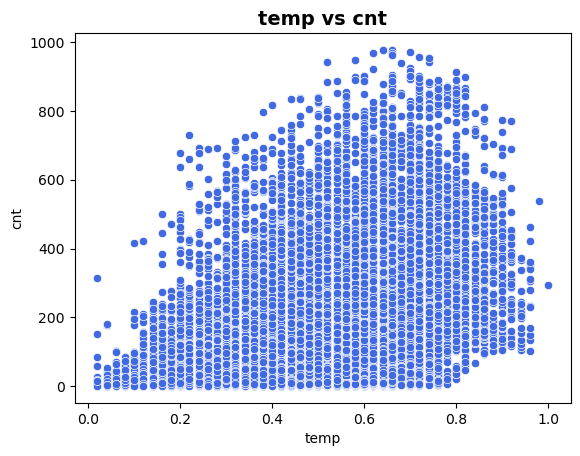

In [68]:
sns.scatterplot(data=df2, x='temp', y='cnt', color='royalblue')
plt.title('temp vs cnt', fontsize=14, fontweight='bold')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

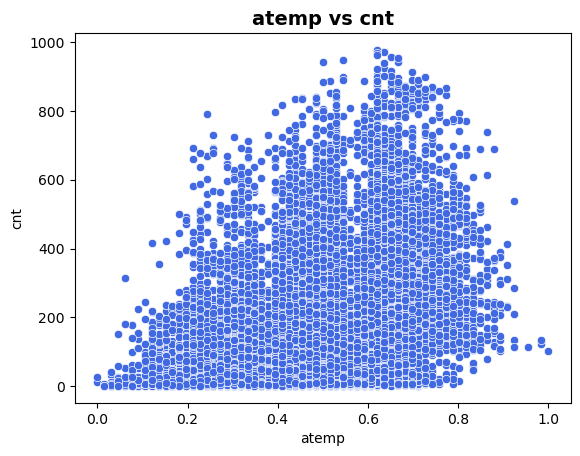

In [69]:
sns.scatterplot(data=df2, x='atemp', y='cnt', color='royalblue')
plt.title('atemp vs cnt', fontsize=14, fontweight='bold')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()

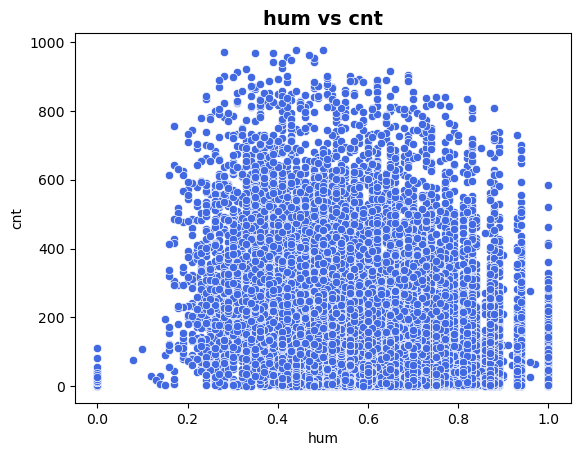

In [71]:
sns.scatterplot(data=df, x='hum', y='cnt', color='royalblue')
plt.title('hum vs cnt', fontsize=14, fontweight='bold')
plt.xlabel('hum')
plt.ylabel('cnt')
plt.show()

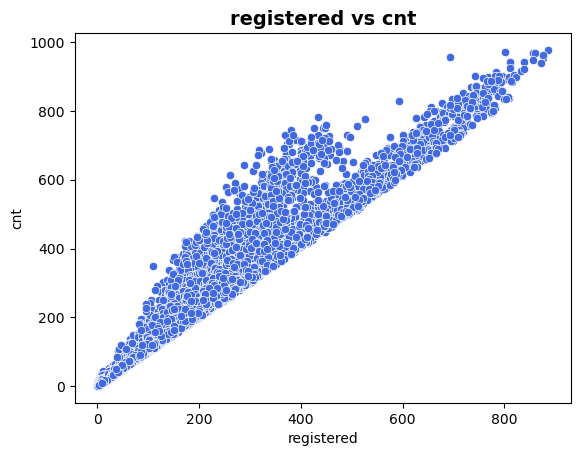

In [73]:
sns.scatterplot(data=df, x='registered', y='cnt', color='royalblue')
plt.title('registered vs cnt', fontsize=14, fontweight='bold')
plt.xlabel('registered')
plt.ylabel('cnt')
plt.show()

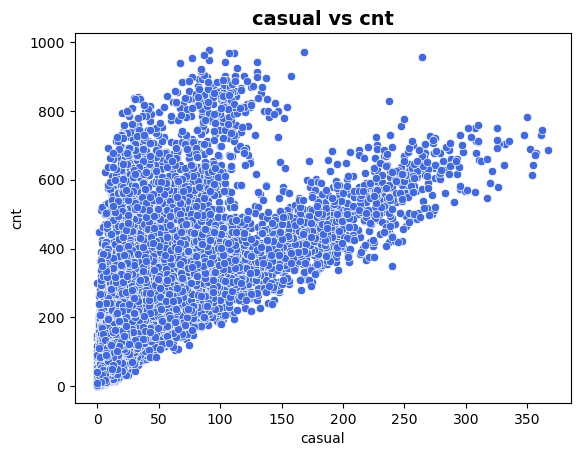

In [75]:
sns.scatterplot(data=df, x='casual', y='cnt', color='royalblue')
plt.title('casual vs cnt', fontsize=14, fontweight='bold')
plt.xlabel('casual')
plt.ylabel('cnt')
plt.show()

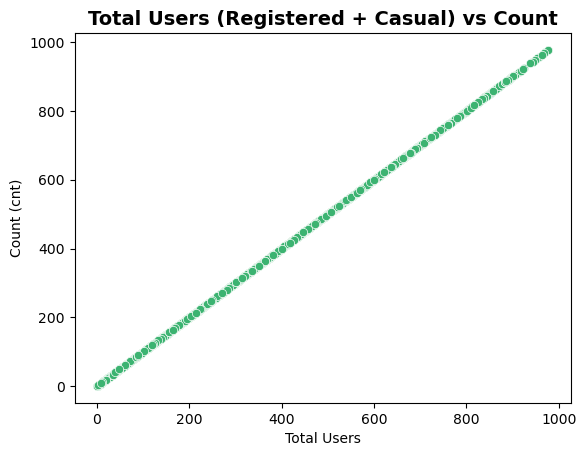

In [77]:
df3 = pd.DataFrame()
df3['total_users'] = df['registered'] + df['casual']
df3['cnt'] = df['cnt']
# Now plot the scatterplot
sns.scatterplot(data=df3, x='total_users', y='cnt', color='mediumseagreen')
plt.title('Total Users (Registered + Casual) vs Count', fontsize=14, fontweight='bold')
plt.xlabel('Total Users')
plt.ylabel('Count (cnt)')
plt.show()

In [79]:
#serious information to understand
df2[['registered','casual','cnt']].head(20)   

,registered,casual,cnt
0,13,3,16
1,32,8,40
2,27,5,32
3,10,3,13
4,1,0,1
5,1,0,1
6,0,2,2
7,2,1,3
8,7,1,8
9,6,8,14


In [81]:
df2.drop(['casual','registered'],inplace = True,axis=1)

In [83]:
X = df2.drop(['cnt'],axis = 1)

In [85]:
y = df2['cnt']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, test_size=0.33,random_state=42)

In [89]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.4427704189899009

In [91]:
lr.coef_

array([-23.15471287,   4.75622315, -24.95642224,   0.23900107,
       216.58339511, -62.7689255 , -35.10173467, -13.19639823,
       -11.48709529,  -9.0743388 ,   4.9282911 , -89.5210061 ,
       -97.19704916,  -2.98465187,  -3.48431144])

In [93]:
lr.intercept_

165.705308587222

In [95]:
df2

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_of_year_sin,day_of_year_cos,season_sin,season_cos,hr_sin,hr_cos,weekday_sin,weekday_cos
0,0,0,1,0.24,0.2879,0.81,0.0000,16,1.716633e-02,0.999853,1.0,6.123234e-17,0.000000,1.000000,-0.781831,0.62349
1,0,0,1,0.22,0.2727,0.80,0.0000,40,1.716633e-02,0.999853,1.0,6.123234e-17,0.258819,0.965926,-0.781831,0.62349
2,0,0,1,0.22,0.2727,0.80,0.0000,32,1.716633e-02,0.999853,1.0,6.123234e-17,0.500000,0.866025,-0.781831,0.62349
3,0,0,1,0.24,0.2879,0.75,0.0000,13,1.716633e-02,0.999853,1.0,6.123234e-17,0.707107,0.707107,-0.781831,0.62349
4,0,0,1,0.24,0.2879,0.75,0.0000,1,1.716633e-02,0.999853,1.0,6.123234e-17,0.866025,0.500000,-0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0,1,2,0.26,0.2576,0.60,0.1642,119,-2.449294e-16,1.000000,1.0,6.123234e-17,-0.965926,0.258819,0.781831,0.62349
17375,0,1,2,0.26,0.2576,0.60,0.1642,89,-2.449294e-16,1.000000,1.0,6.123234e-17,-0.866025,0.500000,0.781831,0.62349
17376,0,1,1,0.26,0.2576,0.60,0.1642,90,-2.449294e-16,1.000000,1.0,6.123234e-17,-0.707107,0.707107,0.781831,0.62349
17377,0,1,1,0.26,0.2727,0.56,0.1343,61,-2.449294e-16,1.000000,1.0,6.123234e-17,-0.500000,0.866025,0.781831,0.62349


In [97]:
df2.corr()['cnt'].sort_values(ascending=False)

cnt                1.000000
temp               0.404772
atemp              0.400929
windspeed          0.093234
workingday         0.030284
weekday_sin       -0.013544
season_cos        -0.019546
weekday_cos       -0.027610
holiday           -0.030927
day_of_year_sin   -0.119403
weathersit        -0.142426
day_of_year_cos   -0.236067
season_sin        -0.242384
hum               -0.322911
hr_cos            -0.408447
hr_sin            -0.410427
Name: cnt, dtype: float64

In [99]:
#0.1>corr<-0.1

In [101]:
df_reduced = df2[['temp','atemp','windspeed','workingday','day_of_year_sin' ,'weathersit','day_of_year_cos','season_sin','hum','hr_cos','hr_sin','cnt']]           

In [103]:
X1 = df_reduced.drop(['cnt'],axis=1)
X1

,temp,atemp,windspeed,workingday,day_of_year_sin,weathersit,day_of_year_cos,season_sin,hum,hr_cos,hr_sin
0,0.24,0.2879,0.0000,0,1.716633e-02,1,0.999853,1.0,0.81,1.000000,0.000000
1,0.22,0.2727,0.0000,0,1.716633e-02,1,0.999853,1.0,0.80,0.965926,0.258819
2,0.22,0.2727,0.0000,0,1.716633e-02,1,0.999853,1.0,0.80,0.866025,0.500000
3,0.24,0.2879,0.0000,0,1.716633e-02,1,0.999853,1.0,0.75,0.707107,0.707107
4,0.24,0.2879,0.0000,0,1.716633e-02,1,0.999853,1.0,0.75,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.2576,0.1642,1,-2.449294e-16,2,1.000000,1.0,0.60,0.258819,-0.965926
17375,0.26,0.2576,0.1642,1,-2.449294e-16,2,1.000000,1.0,0.60,0.500000,-0.866025
17376,0.26,0.2576,0.1642,1,-2.449294e-16,1,1.000000,1.0,0.60,0.707107,-0.707107
17377,0.26,0.2727,0.1343,1,-2.449294e-16,1,1.000000,1.0,0.56,0.866025,-0.500000


In [105]:
y1 = df_reduced[['cnt']]
y1

,cnt
0,16
1,40
2,32
3,13
4,1
...,...
17374,119
17375,89
17376,90
17377,61


In [107]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,shuffle=True, test_size=0.33,random_state=42)

In [108]:
lr1 = LinearRegression()
lr1.fit(X1_train,y1_train)
lr1.score(X1_test,y1_test)

0.4419750380575447